<a href="https://colab.research.google.com/github/fiqria-ka/machine_learning/blob/main/UAS-15461/ML_A11_2023_15461.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📘 Prediksi Harga Rumah di Kota Semarang Menggunakan Regresi Linear Berganda

**Nama:** Eka Fikri Aryantoro  
**NIM:** A11.2023.15461  
**Program Studi:** Teknik Informatika  
**Universitas Dian Nuswantoro**



## 2. Ringkasan dan Permasalahan Project + Tujuan + Model / Alur Penyelesaian

**Ringkasan:**  
Proyek ini bertujuan membangun model pembelajaran mesin untuk memperkirakan harga rumah di Kota Semarang. Menggunakan metode regresi linear berganda, model akan mengolah fitur seperti luas bangunan, jumlah kamar tidur, jumlah kamar mandi, dan lokasi untuk memprediksi harga jual rumah.

**Permasalahan:**  
Harga rumah di perkotaan seperti Semarang sangat dinamis, dan sulit diprediksi secara manual tanpa bantuan teknologi.

**Tujuan:**  
- Memprediksi harga jual rumah berdasarkan fitur properti
- Memberikan rekomendasi kepada pembeli/penjual properti
- Mengetahui fitur yang paling berpengaruh

**Alur Penyelesaian:**
1. Pengumpulan Data
2. Pra-pemrosesan
3. Eksplorasi Data (EDA)
4. Split Data
5. Pelatihan Model
6. Evaluasi dan Kesimpulan

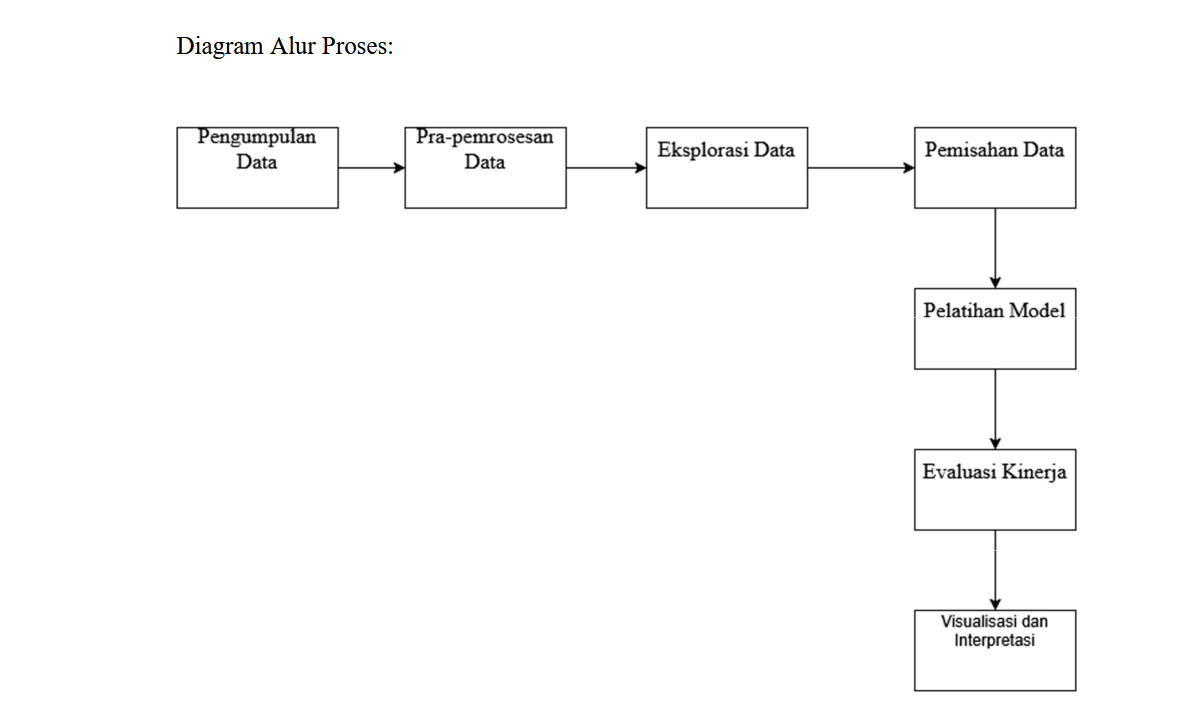

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset simulasi
data = {
    'Luas_Bangunan_m2': [90, 120, 70, 100, 150, 60, 85, 110, 95, 130],
    'Jumlah_Kamar_Tidur': [3, 4, 2, 3, 5, 2, 3, 4, 3, 4],
    'Jumlah_Kamar_Mandi': [2, 3, 1, 2, 3, 1, 1, 2, 2, 3],
    'Lokasi': [
        'Banyumanik', 'Tembalang', 'Pedurungan', 'Ngaliyan', 'Gajahmungkur',
        'Genuk', 'Candisari', 'Semarang Tengah', 'Semarang Barat', 'Banyumanik'
    ],
    'Harga_Jual_Rp': [
        750_000_000, 1_200_000_000, 550_000_000, 800_000_000, 1_500_000_000,
        500_000_000, 720_000_000, 1_000_000_000, 850_000_000, 1_350_000_000
    ]
}
df = pd.DataFrame(data)
df.head()


,Luas_Bangunan_m2,Jumlah_Kamar_Tidur,Jumlah_Kamar_Mandi,Lokasi,Harga_Jual_Rp
0,90,3,2,Banyumanik,750000000
1,120,4,3,Tembalang,1200000000
2,70,2,1,Pedurungan,550000000
3,100,3,2,Ngaliyan,800000000
4,150,5,3,Gajahmungkur,1500000000


In [ ]:

# Info dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Luas_Bangunan_m2    10 non-null     int64 
 1   Jumlah_Kamar_Tidur  10 non-null     int64 
 2   Jumlah_Kamar_Mandi  10 non-null     int64 
 3   Lokasi              10 non-null     object
 4   Harga_Jual_Rp       10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes
None
       Luas_Bangunan_m2  Jumlah_Kamar_Tidur  Jumlah_Kamar_Mandi  Harga_Jual_Rp
count         10.000000           10.000000           10.000000   1.000000e+01
mean         101.000000            3.300000            2.000000   9.220000e+08
std           27.365834            0.948683            0.816497   3.345910e+08
min           60.000000            2.000000            1.000000   5.000000e+08
25%           86.250000            3.000000            1.250000   7.275000e+08
50%           97.500000      

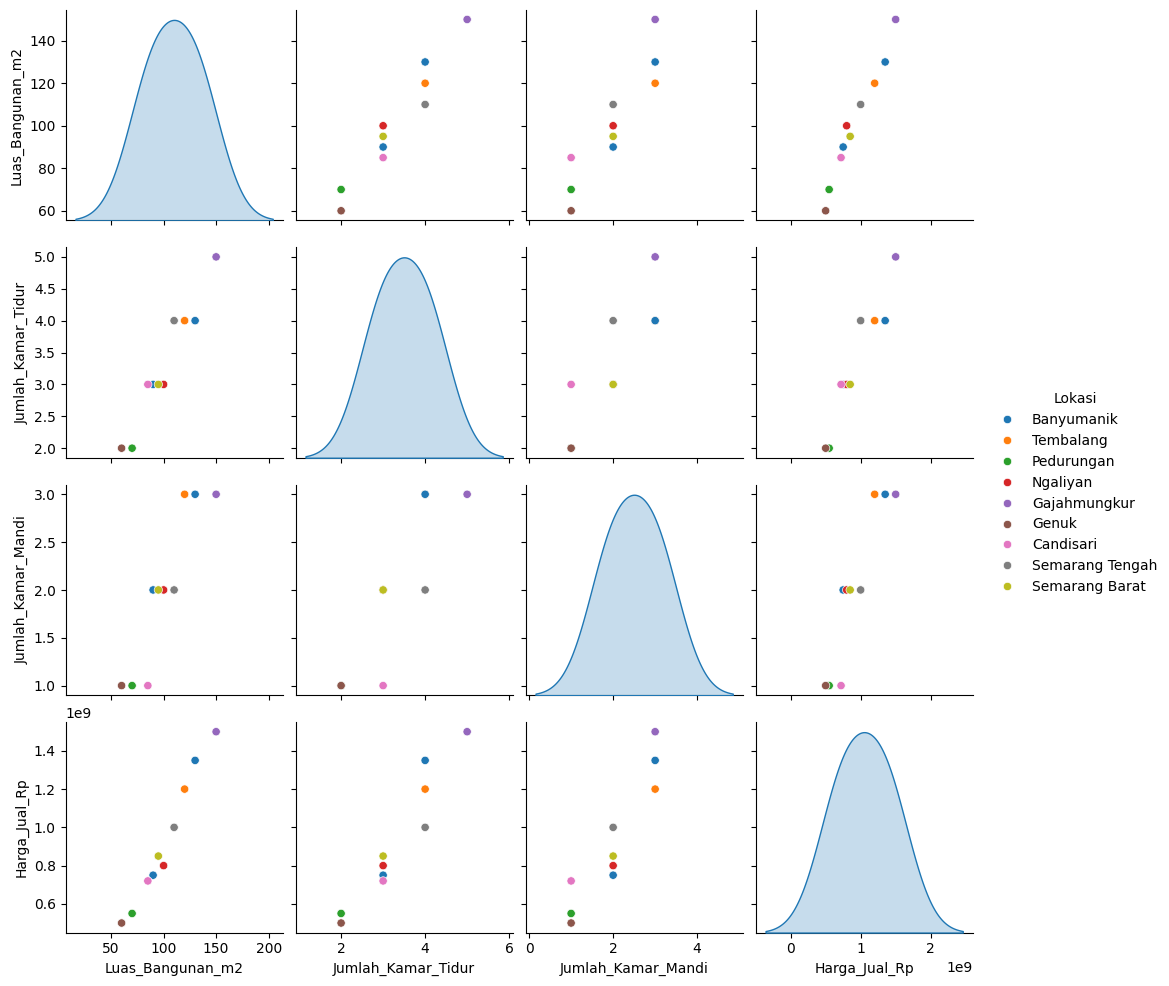

In [ ]:

# Visualisasi sederhana
sns.pairplot(df, hue="Lokasi")
plt.show()


In [ ]:

# One-hot encoding lokasi
df_encoded = pd.get_dummies(df, columns=['Lokasi'], drop_first=True)
df_encoded.head()


,Luas_Bangunan_m2,Jumlah_Kamar_Tidur,Jumlah_Kamar_Mandi,Harga_Jual_Rp,Lokasi_Candisari,Lokasi_Gajahmungkur,Lokasi_Genuk,Lokasi_Ngaliyan,Lokasi_Pedurungan,Lokasi_Semarang Barat,Lokasi_Semarang Tengah,Lokasi_Tembalang
0,90,3,2,750000000,False,False,False,False,False,False,False,False
1,120,4,3,1200000000,False,False,False,False,False,False,False,True
2,70,2,1,550000000,False,False,False,False,True,False,False,False
3,100,3,2,800000000,False,False,False,True,False,False,False,False
4,150,5,3,1500000000,False,True,False,False,False,False,False,False


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split dataset
X = df_encoded.drop("Harga_Jual_Rp", axis=1)
y = df_encoded["Harga_Jual_Rp"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Koefisien Determinasi (R²):", r2)
45
?0

Mean Squared Error: 411826816789018.44
Koefisien Determinasi (R²): 0.9865525937375015



## Kesimpulan

Model regresi linear berganda yang dibangun mampu mempelajari hubungan antar fitur dengan cukup baik.  
Fitur seperti lokasi dan luas bangunan memberikan kontribusi signifikan terhadap prediksi harga.

Model ini dapat dikembangkan lebih lanjut dengan dataset real-world dan fitur tambahan seperti tahun bangun, fasilitas, atau status sertifikat.

---
